In [1]:
import pandas as pd
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import chainer

/home/mayu-ot/miniconda3/envs/py36chainer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
% cd /mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [10]:
img_dir = '../../Dataset/Flickr30kEntities/flickr30k-images/'

In [3]:
head_template = '''<!-- Start Styles. Move the 'style' tags and everything between them to between the 'head' tags -->
<style type="text/css">
.myOtherTable { width:1500px;background-color:#FFFFE0;border-collapse:collapse;color:#000;font-size:18px; }
.myOtherTable th { background-color:#BDB76B;color:white;width:15%;font-variant:small-caps; }
.myOtherTable td, .myOtherTable th { padding:5px;border:0; }
.myOtherTable td { font-family:Georgia, Garamond, serif; border-bottom:1px solid #BDB76B;height:180px; }
</style>
<!-- End Styles -->
<table class="myOtherTable">
<tr>
<th>Image</th><th>Attention 1</th> <th>Attention 2</th> <th>Results</th>
</tr>
'''

bottom_template = '''
</table>
'''

row_template = '''
<tr>
<td>{}</td><td>{}</td><td>{}</td><td>{}</td>
</tr>
'''

img_template = '''
<img src="{}" width=155" height="155" />
'''

txt_template = '''
<p style="text-align:left;">{}</p>
'''

In [5]:
# visual clue helped paraphrase classification

def load_results(base_dir, non_vis_base_dir):
    df_vis = pd.read_csv(base_dir + 'res_test.csv')
    df_non_vis = pd.read_csv(non_vis_base_dir + 'res_test.csv')
    df_input = pd.read_csv('data/pl-clc/phrase_pair_test.csv')
    return df_vis, df_non_vis, df_input
    

def write_html_doc(base_dir, non_vis_base_dir, visual_better = True):
    df_vis, df_non_vis, df_input = load_results(base_dir, non_vis_base_dir)
    res_vis = (df_vis.ypred == df_vis.ytrue)
    res_non_vis = (df_non_vis.ypred == df_non_vis.ytrue)
    
    df_vis = pd.read_csv(base_dir+'res_test.csv')
    df_non_vis = pd.read_csv(non_vis_base_dir+'res_test.csv')
    df_input = pd.read_csv('data/pl-clc/phrase_pair_test.csv')

    att_dir = base_dir + 'attention_images/'
    out_name = 'visual_better.html' if visual_better else 'non-visual_better.html'
    
    with open(base_dir + out_name, 'w') as f:
        f.write(head_template)
        for i, row in df_vis[(res_vis == visual_better) & (res_non_vis == (not visual_better))].iterrows():
            img_src = img_dir + '%i.jpg'%row['image']
            img_item = img_template.format(img_src)

            att_item1 = txt_template.format(row['phrase1']) + img_template.format(att_dir + '%i-%s.jpg'%(row['image'], row['phrase1']))
            att_item2 = txt_template.format(row['phrase2']) + img_template.format(att_dir + '%i-%s.jpg'%(row['image'], row['phrase2']))

            text_item = txt_template.format('{} == {} ?'.format(df_input.iloc[i]['org_phrase1'], df_input.iloc[i]['org_phrase2']))
            text_item += txt_template.format('GT: {}'.format(row['ytrue']))
            text_item += txt_template.format('Vis: {}'.format(row['ypred']))
            text_item += txt_template.format('non-Vis: {}'.format(not row['ypred']))
            f.write(row_template.format(img_item, att_item1, att_item2, text_item))
        f.write(bottom_template)

In [ ]:
write_html_doc('bo_out/frcnn+wea/plclc-roi/14-frcnn+wea-plclc-roi_20180413-165302/', 'bo_out/none+wea/wo-vis/11-none+wea-wo-vis_20180410-220417/', True)
write_html_doc('bo_out/frcnn+wea/plclc-roi/14-frcnn+wea-plclc-roi_20180413-165302/', 'bo_out/none+wea/wo-vis/11-none+wea-wo-vis_20180410-220417/', False)

In [32]:
from IPython import display

def show_html_doc(base_dir, non_vis_base_dir, visual_better = True):
    df_vis, df_non_vis, df_input = load_results(base_dir, non_vis_base_dir)
    res_vis = (df_vis.ypred == df_vis.ytrue)
    res_non_vis = (df_non_vis.ypred == df_non_vis.ytrue)
    
    df_vis = pd.read_csv(base_dir+'res_test.csv')
    df_non_vis = pd.read_csv(non_vis_base_dir+'res_test.csv')
    df_input = pd.read_csv('data/pl-clc/phrase_pair_test.csv')

    att_dir = '/' + base_dir + 'attention_images/'
#     out_name = 'visual_better.html' if visual_better else 'non-visual_better.html'
    img_dir = '/data/flickr30k-images/'
    print(att_dir)
    print(img_dir)
    
    html = head_template
    
    df_smpl = df_vis[(res_vis == visual_better) & (res_non_vis == (not visual_better))]
    print(len(df_smpl))
    df_smpl = df_smpl[::20]
    
    for i, row in df_smpl.iterrows():
        img_src = img_dir + '%i.jpg'%row['image']
        img_item = img_template.format(img_src)

        att_item1 = txt_template.format(row['phrase1']) + img_template.format(att_dir + '%i-%s.jpg'%(row['image'], row['phrase1']))
        att_item2 = txt_template.format(row['phrase2']) + img_template.format(att_dir + '%i-%s.jpg'%(row['image'], row['phrase2']))

        text_item = txt_template.format('{} == {} ?'.format(df_input.iloc[i]['org_phrase1'], df_input.iloc[i]['org_phrase2']))
        text_item += txt_template.format('GT: {}'.format(row['ytrue']))
        text_item += txt_template.format('Vis: {}'.format(row['ypred']))
        text_item += txt_template.format('non-Vis: {}'.format(not row['ypred']))
        html += row_template.format(img_item, att_item1, att_item2, text_item)
        
    
    return html+bottom_template
#         display.HTML(html)
#         break

html = show_html_doc('bo_out/frcnn+wea/plclc-roi/14-frcnn+wea-plclc-roi_20180413-165302/', 'bo_out/none+wea/wo-vis/11-none+wea-wo-vis_20180410-220417/', False)

/bo_out/frcnn+wea/plclc-roi/14-frcnn+wea-plclc-roi_20180413-165302/attention_images/
/data/flickr30k-images/
1042


In [33]:
display.HTML(html)

Image,Attention 1,Attention 2,Results
,beach,ocean,the beach == the ocean ? GT: False Vis: True non-Vis: False
,artist,pottery+maker,An artist == A pottery maker ? GT: True Vis: False non-Vis: True
,various+used+toys,merchandise,various used toys == merchandise ? GT: True Vis: False non-Vis: True
,petals,bubbles,the petals == bubbles ? GT: False Vis: True non-Vis: False
,traffic+director,man,A traffic director == A man ? GT: True Vis: False non-Vis: True
,man,boy,a man == A boy ? GT: True Vis: False non-Vis: True
,large+brown+dog,big+dog,A large brown dog == A big dog ? GT: True Vis: False non-Vis: True
,stick,toys,stick == toys ? GT: False Vis: True non-Vis: False
,false+eyebrows,joke+glasses,false eyebrows == joke glasses ? GT: False Vis: True non-Vis: False
,game+score,golf+course,the game score == a golf course ? GT: False Vis: True non-Vis: False


In [23]:
import tables
df_roi = pd.read_csv('data/pl-clc/phrase_pair_wt_plclcbbox_test.csv')
roi_file = tables.open_file('data/region_feat/roi/full_test.h5')

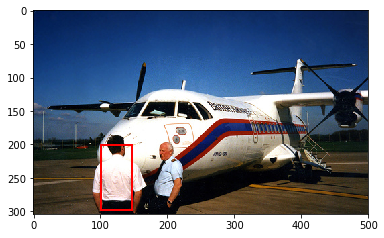

In [20]:
im = plt.imread('data/flickr30k-images/76466808.jpg')
im = draw_bbox(im.copy(), [100, 200, 150, 300], (255, 0, 0), width=3)
plt.imshow(im)

In [24]:
import os


def draw_bbox(img, bounding_box, color, width = 1):
    '''
    bounding_box: (xmin, ymin, xmax, ymax)
    '''
    img[bounding_box[1]:bounding_box[1]+width, bounding_box[0]:bounding_box[2]-1] = color
    img[bounding_box[1]:bounding_box[3]-1, bounding_box[0]:bounding_box[0]+width] = color

    img[bounding_box[3]-1-width:bounding_box[3]-1, bounding_box[0]:bounding_box[2]-1] = color
    img[bounding_box[1]:bounding_box[3]-1, bounding_box[2]-1-width:bounding_box[2]-1] = color
    return img
    
def plot_attention_map(im, roi):
    att_map = np.ones(im.shape[:2])

    for r in roi:
        xmin, ymin, xmax, ymax = r.ravel()
        att_map[ymin:ymax, xmin:xmax] = .3

    att_map = cmap(att_map)[:,:,:3]
    im_out = im / 255. * .5 + att_map * .5
    return im_out

def plot_bbox(im, roi):
    for r in roi:
        im = draw_bbox(im, r.ravel(), color=(255, 0, 0), width=3)
    return im

def save_grounding_img(base_dir, non_vis_base_dir, visual_better=True):
    df_vis, df_non_vis, df_input = load_results(base_dir, non_vis_base_dir)
    res_vis = (df_vis.ypred == df_vis.ytrue)
    res_non_vis = (df_non_vis.ypred == df_non_vis.ytrue)
    
    out_dir = base_dir + 'attention_images/'
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
        
    cmap = plt.get_cmap('Greys')

    for i, row in df_vis[(res_vis == visual_better) & (res_non_vis == (not visual_better))].iterrows():
        im = plt.imread(img_dir + '%i.jpg'%row['image'])
        # get roi proposals
        rois = roi_file.get_node('/', str(row['image'])).read()


        res = df_roi[(df_roi.image == row['image']) & (df_roi.phrase1 == row['phrase1']) & (df_roi.phrase2 == row['phrase2'])]

        roi1 = rois[res['roi1']]
        roi2 = rois[res['roi2']]

        for roi, p in zip([roi1, roi2], [row['phrase1'], row['phrase2']]):
            im_out = plot_bbox(im.copy(), roi)
#             im_out = plot_attention_map(im, roi)

            imageio.imsave(out_dir+'%i-%s.jpg'%(row['image'], p), im_out)

In [30]:
save_grounding_img('bo_out/frcnn+wea/plclc-roi/14-frcnn+wea-plclc-roi_20180413-165302/', 'bo_out/none+wea/wo-vis/11-none+wea-wo-vis_20180410-220417/', False)